# Step 1: Data Collection

Includes data scraping and manual collection. Collecting data regarding:
- Pitch (note) -> hue
- Amplitude -> size
- Timbre -> shape


## Data Scraping
Source: https://www.thesynesthesiatree.com/2021/03/tone-colour-musical-note-colour.html

Source Description: Describes tone-colour synesthesia which is a subtype of chromesthesia. Describes how hearing a certain tone or pitch can trigger a visualization of color in the minds of those who experience this. Includes an image with potential correlation of notes and colors that individuals have reportedly experienced.

Resources used:
- https://www.geeksforgeeks.org/python/image-scraping-with-python/ - image scraping
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/ - beautiful soup for web scraping
- https://www.w3schools.com/tags/tag_img.asp - understanding img tagging
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ginput.html - interactive figures

In [3]:
%matplotlib tk

In [4]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
from urllib.request import urlretrieve
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# imports relevant libraries

In [5]:
url = "https://www.thesynesthesiatree.com/2021/03/tone-colour-musical-note-colour.html"
# synesthesia tree website url inputted

def link2soup(link):
    """Convert a link to a BeautifulSoup object."""
    data = requests.get(link).text
    # gets the contents of the url and turns into text for ouput
    return BeautifulSoup(data, 'html.parser')
    # function that takes in link and turns into BeautifulSoup object

soup = link2soup(url)
# uses function above to turn our desired link into Beautiful Soup

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html class="v2" dir="ltr" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:b="http://www.google.com/2005/gml/b" xmlns:data="http://www.google.com/2005/gml/data" xmlns:expr="http://www.google.com/2005/gml/expr">
 <head>
  <link href="https://www.blogger.com/static/v1/widgets/4128112664-css_bundle_v2.css" rel="stylesheet" type="text/css"/>
  <meta content="width=1100" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="blogger" name="generator"/>
  <link href="https://www.thesynesthesiatree.com/favicon.ico" rel="icon" type="image/x-icon"/>
  <link href="https://www.thesynesthesiatree.com/2021/03/tone-colour-musical-note-colour.html" rel="canonical"/>
  <link href="https://www.thesynesthesiatree.com/feeds/posts/default" rel="alternate" title="The Synesthesia Tree - Atom" type="application/atom+xml"/>
  <link href="https://www.thesynesthesiatree.com/feeds/posts/default?alt=rss" rel="alternate" title="The Synesthesia

Download complete. Please view image for color/note associations


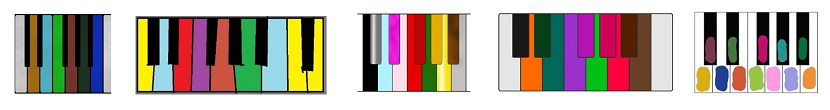

In [7]:
filename = "ChromesthesiaPiano.jpg"
# creates filename for image
url = "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjYLc1_adzZrgrIDVtkpLyeTrFc3U_2XxvFWj0XTrY3he8ny_yZNfWCQr6d3aSQzwUjxbex6suJCsV76_W9ZCXybUI8V3OEM8cBCtNaPft_gvCbX2iWW097C1WP-Rn4TrgZ4P9U9c_Xkb9p/s1600/Pianos+de+personas+nota-color+diferentes.jpg"
# found url in beautiful soup documentation above and copied here

urlretrieve(url, filename)
# retrieve url information and downloads as the filename created
print("Download complete. Please view image for color/note associations")
# print so user knows image is downloaded 

image = Image.open(filename)
# opens saved image
display(image)
# displays image 

## Image Color Extraction


In [9]:
RGBimage = image.convert ('RGB')
# converts saved image into RGB 
data = np.array(RGBimage)
# converts image into numpy array

fig = plt.imshow(data)
# creates graph with the image I saved

plt.title('Chromesthesia: Colors on Piano Notes', fontsize = 17)
# titles graph and sets font size

coords = plt.ginput(n=-1, timeout = 0)
# saves coordinates as each time the user clicks (they have unlimited clicks until they hit enter), those specific x y points on image saved
plt.close()
# close graph output so doesn't show

notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
# saves all the notes we will have a corresponding color to a list
notes_to_colors = {}
# empty dictionary

for i, (x,y) in enumerate(coords):
    # for loop for each x,y coordinate element
    x = int(x)
    y = int(y)
    # coordinates for x and y both converted to ints
    rgb = data[y,x]
    # gets rgb value of clicked pixel/coordinate on graph
    if i< len(notes):
        notes_to_colors[notes[i]] = rgb
        # for each loop it will take that indexed part of the notes and then assign it to the rgb value selected
        print(f"Note: {notes[i]} + RGB: {rgb}")
        # prints out dictionary with note + assigned rgb value

Note: C + RGB: [229 229 229]
Note: C# + RGB: [252 252 252]
Note: D + RGB: [255 105   0]
Note: D# + RGB: [65 46  4]
Note: E + RGB: [  2 104  90]
Note: F + RGB: [153  50 204]
Note: F# + RGB: [142  65 179]
Note: G + RGB: [  5 190  26]
Note: G# + RGB: [208   0  93]
Note: A + RGB: [255   0  62]
Note: A# + RGB: [83 33  0]
Note: B + RGB: [104  65  36]


# Part 2: Neural Network

Using NetworkX to create a neural network. Each node represents a note, some of different octaves, and each one is colored using the associated RGB value above (higher octaves have a lighter color, lower octaves have a darker color. The edges are represented by the relationship of a chromatic circle of note associations in which similar notes of different octaves are grouped together arranged in a circle going from C, C#, D, etc.

Sources:
- https://networkx.org/documentation/stable/tutorial.html
- https://github.com/networkx/networkx
- https://www.w3schools.com/python/ref_func_enumerate.asp 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
# import relevant libraries

In [12]:
octaves = [-2, -1, 0, 1, 2]
# 0 represents the note at the middle C octave position
# negative represents going down an octave, positive is goin gup an octave
notes_list = list(notes_to_colors.keys())
# turns just the notes in the dictionary into a list for future reference

In [13]:
def coloradjust(rgb, factor):
    """
    Darken or lighten RGB based on the octave
    """
    rgb = np.array(rgb, dtype=float)
    # convert rgb value to array so that we can alter, floats for precision
    newrgb = rgb * factor
    # multiples rgb by the factor associated with the octave
    newrgb[newrgb < 0] =0
    # if the new calculated rgb is below 0, just make it 0 so that it is within the number range for rgb
    newrgb[newrgb > 255] = 255
    # similarly, if above 255 just make it 255 to make sure it isn't above number range for rgb
    return tuple(newrgb/255)
    # returns a tuple / by 255 to make sure the value is in between 0 and 1 for matplot lib functions where rgb value is 0.0-1.0

In [14]:
graph = nx.Graph()
# create graph

for note, initial_rgb in notes_to_colors.items():
    # going through each original/base rgb value identified in our dictionary above for each note associated with it
    for i in octaves:
        # for each value in the octaves list
        factor = 1 + (0.25 * i)
        # how much to lighten the original color- lighter for positive, darker for negative
        if i >= 0:
            node_name = f"{note}+{i}"
            # if octave is positive then add positive side in front of octave
        else: 
            node_name = f"{note}{i}"
            # if it is negative the - is automatically added from octave
        graph.add_node(node_name, color=coloradjust(initial_rgb, factor))
        # adds each node to the graph and adjusts the color based on the note and octave associated with it
for note in notes_to_colors.keys():
    # using.keys gives us the note names in our dictionary
    octave_nodes = []
    for i in octaves:
        # for each value in the octaves (like -1, 0 ...) create a string of the note (from the keys) and the i value 
        if i >= 0:
            octave_nodes.append(f"{note}+{i}")
            # if octave is positive then add positive side in front of octave
        else: 
            octave_nodes.append(f"{note}{i}")
            # if it is negative the - is automatically added from octave
    for i in range(len(octave_nodes) - 1):
        # for each i in the entire list of the octave nodes
        graph.add_edge(octave_nodes[i], octave_nodes[i+1])
        # add an edge between two nodes (the node we're at in the loop at the moment, as well as the node after it)

for i in range(len(notes_list)):
    # loops through indexes within the list of notes from above
    note = notes_list[i]
    # the note is the note list indexed at the point in each loop runthrough
    next_note = notes_list[(i+1) % len(notes_list)]
    # the length of the note list is 12
    # this is find the remainder of the current index + 1 (moving forward to the next note) 
    # divded by total number of length of note list), then that remainder is used to index the note list for the next note
    # instead of just taking the next note, this helps wrap around to form the chromatic circle
    graph.add_edge(f"{note}+0", f"{next_note}+0")
    # adds edges to the middle notes next to each other to wrap around.
    # last function was taking the same note from different octaves and making a circle, this function is focused on connecting those notes together
    # so this last part adds an edge in between the middle notes such as C+0 (middle C) and C#+0 (the next note after)
    # at the end, this will also help B+ wrap back to C again (which B+ is C, but this is how the notes are connected on the chromatic circle

In [34]:
circle = nx.circular_layout(notes_list, scale=8.0)
# automatic arrangemenet into a circle
# gave it the list of notes, returns dictionary with note and every note has a coordinate which is on the 0-5.0 scale, 
# the 5.0 is also the radius of the circle, determining note spread

positions = {}
# initalize dictionary for below (holding positions/coordinates for each note horizontal/vertical position)
for note, baseposition in circle.items():
    # very helpful- https://stackoverflow.com/questions/79294881/how-can-i-get-a-certain-number-of-evenly-spaced-points-along-the-octagon-perimet
    # taking the info from the dictionary returned as tuple above
    base_x, base_y = baseposition
    # unpacking base position tuple
    angle_offset = np.linspace(0,2*np.pi, len(octaves), endpoint = False)
    # the linspace determines evenly set angles for each node between 0 and 2pi (circumference of circle with diameter 1, unit curcle)
    # since there are 5 octaves, there are 5 angles that will be here, determining position of nodes
    radius = 1.0
    # radius of the smaller circle within the main circle set- this will be distance of main note to the same note of different octaves
    for i, octave in enumerate(octaves):
        positions[f"{note}{octave:+d}"] = (base_x + radius * np.cos(angle_offset[i]), base_y + radius * np.sin(angle_offset[i]))
        # basex is coordinate of note on the main circle, the radius is the distance from that note to its octave notes
        # angle offset has the evenly spaced nodes around the circle and is indexed at i which is the specific loop we are in now for the note, 
        # this angle offset position is calculated for its cosine, which gives horizontal position of note
        # same for y, but now it is with its vertical position and using sine to calculate it
        # by end positions dictionary has the positions/coordinate for each node (main node + the different octaves of it as it loops through)


In [36]:
node_colors = [graph.nodes[i]['color'] for i in graph.nodes()]
# list comprehension, extracts the color for each node as found above for each note node in graph
nx.draw(graph, positions, node_color=node_colors, edge_color = 'gray', font_color = 'white', with_labels=True, node_size= 800, font_size=6, width = 1.5)
# draws graph- graph is the object with everything in it, positions are the coordinates of the nodes as a dictionary, 
# node colors assigned to the node colors extracted, edge color to be gray, true labels means the nodes will have the node label of note/octave
# the node size/font size is set and width of edges is increased

plt.title("Visualization of Chromatic Circle of Musical Notes of Different Octaves")
# sets title
plt.show()
# show image


    
